In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

In [2]:
# Define path to files
# For MacOS
PATH = "C:\\Users\\nafissaad\\Finance\\Stock List\\"
# For Windows
# PATH = "D:/Python for Finance/Stocks/"

# Start date defaults
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = "2017-01-03"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2021
E_MONTH = 8
E_DAY = 19
E_DATE_STR = "2021-08-19"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

In [3]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

['A',
 'AA',
 'AAL',
 'AAME',
 'AAN',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'AAWW',
 'ABBV',
 'ABC',
 'ABCB',
 'ABEO',
 'ABG',
 'ABIO',
 'ABM',
 'ABMD',
 'ABR',
 'ABT',
 'ABTX',
 'AC',
 'ACA',
 'ACAD',
 'ACBI',
 'ACC',
 'ACCO',
 'ACER',
 'ACGL',
 'ACHC',
 'ACHV',
 'ACIW',
 'ACLS',
 'ACM',
 'ACMR',
 'ACN',
 'ACNB',
 'ACOR',
 'ACRE',
 'ACRS',
 'ACRX',
 'ACTG',
 'ACU',
 'ACY',
 'ADBE',
 'ADC',
 'ADES',
 'ADI',
 'ADM',
 'ADMA',
 'ADMP',
 'ADNT',
 'ADP',
 'ADS',
 'ADSK',
 'ADT',
 'ADTN',
 'ADUS',
 'ADVM',
 'ADXS',
 'AE',
 'AEE',
 'AEHR',
 'AEIS',
 'AEL',
 'AEMD',
 'AEO',
 'AEP',
 'AERI',
 'AES',
 'AEY',
 'AFG',
 'AFI',
 'AFIN',
 'AFL',
 'AGCO',
 'AGE',
 'AGEN',
 'AGFS',
 'AGIO',
 'AGLE',
 'AGM',
 'AGNC',
 'AGO',
 'AGR',
 'AGRX',
 'AGS',
 'AGTC',
 'AGX',
 'AGYS',
 'AHH',
 'AHT',
 'AIG',
 'AIMC',
 'AIN',
 'AINC',
 'AIR',
 'AIRG',
 'AIRI',
 'AIRT',
 'AIT',
 'AIV',
 'AIZ',
 'AJG',
 'AJRD',
 'AJX',
 'AKAM',
 'AKBA',
 'AKR',
 'AKTS',
 'AL',
 'ALB',
 'ALBO',
 'ALCO',
 'ALDX',
 'ALE',
 'ALEC'

In [4]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv')
    except FileNotFoundError:
        pass
        # print("File Doesn't Exist")
    else:
        return df

In [5]:
def get_valid_dates(df, sdate, edate):  
    try:
        mask = (df['Date'] > sdate) & (df['Date'] <= edate) 
        sm_df = df.loc[mask]
        sm_df = sm_df.set_index(['Date'])
        sm_date = sm_df.index.min()
        last_date = sm_df.index.max()
        date_leading = '-'.join(('0' if len(x)<2 else '')+x for x in sm_date.split('-'))
        date_ending = '-'.join(('0' if len(x)<2 else '')+x for x in last_date.split('-'))
    except Exception:
        print("Date Corrupted")
    else:
        return date_leading, date_ending

In [6]:
def roi_between_dates(df, sdate, edate):
    try: 
        start_val = df.loc[sdate,'Adj Close'] 
        end_val = df.loc[edate,'Adj Close']
        roi = ((end_val - start_val) / start_val)
    except Exception:
        print("Data Corrupted")
    else:
        return roi

In [7]:
def get_sd_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].std()

In [8]:
def get_cov_between_dates(df, sdate, edate):
    mean = get_mean_between_dates(df, sdate, edate)
    sd = get_sd_between_dates(df, sdate, edate)
    return sd / mean

In [9]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        df['Date'] = pd.to_datetime(df['Date'])
        # Use a mask to grab data between defined dates
        mask = (df['Date'] >= sdate) & (df['Date'] <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

In [10]:
# For Windows
# sec_df = pd.read_csv('D:/Python for Finance/stock_sectors.csv')
# For Mac
sec_df = pd.read_csv('E:\\New folder\\data set\\stock_sectors.csv')
sec_df

# Get Industrials DF
indus_df = sec_df.loc[sec_df['Sector'] == "Industrials"]
health_df = sec_df.loc[sec_df['Sector'] == "Health Care"]
it_df = sec_df.loc[sec_df['Sector'] == "Information Technology"]
comm_df = sec_df.loc[sec_df['Sector'] == "Communication Services"]
staple_df = sec_df.loc[sec_df['Sector'] == "Consumer Staples"]
discretion_df = sec_df.loc[sec_df['Sector'] == "Consumer Discretionary"]
utility_df = sec_df.loc[sec_df['Sector'] == "Utilities"]
financial_df = sec_df.loc[sec_df['Sector'] == "Financials"]
material_df = sec_df.loc[sec_df['Sector'] == "Materials"]
restate_df = sec_df.loc[sec_df['Sector'] == "Real Estate"]
energy_df = sec_df.loc[sec_df['Sector'] == "Energy"]
health_df

,Symbol,Name,Sector
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ABMD,Abiomed,Health Care
13,A,Agilent Technologies,Health Care
19,ALGN,Align Technology,Health Care
...,...,...,...
474,VTRS,Viatris,Health Care
484,WAT,Waters Corporation,Health Care
488,WST,West Pharmaceutical Services,Health Care
502,ZBH,Zimmer Biomet,Health Care


In [11]:
def get_rois_for_stocks(stock_df):
    # Will hold all tickers & stock rois
    tickers = []
    rois = []

    # iterrows provides the index and column for each row in the DF
    for index, row in stock_df.iterrows():
        df = get_df_from_csv(row['Symbol'])
    
        # If we can't find the ticker delete it from the dataframe
        if df is None:
            pass
            # print(row['Symbol'], " is not available")
        else:
            tickers.append(row['Symbol'])
            sdate, edate = get_valid_dates(df, '2018-01-01', '2020-12-31')
            df = df.set_index(['Date'])
            roi = roi_between_dates(df, sdate, edate)
            rois.append(roi)
    return pd.DataFrame({'Ticker':tickers, 'ROI':rois})

In [12]:
industrial = get_rois_for_stocks(indus_df)
health_care = get_rois_for_stocks(health_df[:45])
it = get_rois_for_stocks(it_df)
commun = get_rois_for_stocks(comm_df)
staple = get_rois_for_stocks(staple_df)
discretion = get_rois_for_stocks(discretion_df)
utility = get_rois_for_stocks(utility_df)
finance = get_rois_for_stocks(financial_df)
material = get_rois_for_stocks(material_df)
restate = get_rois_for_stocks(restate_df)
energy = get_rois_for_stocks(energy_df)

In [13]:
industrial.sort_values(by=['ROI'], ascending=False).head(5)

,Ticker,ROI
25,GNRC,3.734749
8,CARR,2.172381
11,CPRT,1.918578
63,TDG,1.518984
10,CTAS,1.325594


In [14]:
health_care.sort_values(by=['ROI'], ascending=False).head(5)

,Ticker,ROI
25,DXCM,5.375582
44,MRNA,4.616667
33,IDXX,2.167543
16,CTLT,1.475499
11,TECH,1.463252


In [15]:
it.sort_values(by=['ROI'], ascending=False).head(5)

,Ticker,ROI
21,ENPH,66.488464
2,AMD,7.352459
52,PAYC,4.622203
59,NOW,3.178471
72,ZBRA,2.705814


In [16]:
commun.sort_values(by=['ROI'], ascending=False).head(20)

,Ticker,ROI
16,NFLX,1.689262
23,TWTR,1.209302
20,TMUS,1.105715
4,CHTR,0.895722
21,TTWO,0.840804
14,LYV,0.722861
22,DIS,0.666390
2,GOOG,0.644958
1,GOOGL,0.633082
10,FB,0.505677


In [17]:
staple.sort_values(by=['ROI'], ascending=False).head(5)

,Ticker,ROI
10,EL,1.145197
9,COST,1.112863
19,MKC,0.977708
3,CHD,0.838447
25,PG,0.674050


In [18]:
discretion.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
53,TSLA,10.007861
18,ETSY,7.541047
11,CMG,3.733606
44,POOL,1.931030
52,TGT,1.839622


In [19]:
utility.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
0,AES,1.402913
18,NEE,1.136333
4,AWK,0.819223
26,WEC,0.530404
27,XEL,0.519897


In [20]:
finance.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
40,MSCI,2.612068
35,MKTX,1.860333
6,AJG,1.112315
38,MCO,1.044882
50,SPGI,1.012123


In [21]:
material.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
4,BLL,1.474667
24,SHW,0.824243
16,LIN,0.785526
0,APD,0.771643
19,NEM,0.689577


In [22]:
restate.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
22,SBAC,0.772695
8,EQIX,0.692928
18,PLD,0.689758
1,AMT,0.685783
5,CCI,0.622156


In [23]:
energy.sort_values(by=['ROI'], ascending=False).head(5)

,Ticker,ROI
9,HES,0.168440
15,OKE,-0.131481
10,KMI,-0.146362
3,COP,-0.217487
20,WMB,-0.218709


In [24]:
port_list = ["GNRC", "DXCM", "AMD", "NFLX", "EL", "TSLA", "AES", "MSCI", 
             "BLL", "SBAC", "HES"]

In [25]:
mult_df=merge_df_by_column_name('daily_return','2018-01-01','2020-12-31',*port_list)
mult_df

,GNRC,DXCM,AMD,NFLX,EL,TSLA,AES,MSCI,BLL,SBAC,HES
251,-0.030089,0.010455,0.068093,0.047458,0.002751,0.029485,0.004617,0.009009,0.020608,-0.016711,0.008005
252,0.035395,0.001552,0.051913,0.019794,0.015910,-0.010233,-0.000919,0.015194,-0.002589,0.012513,0.032393
253,0.006837,-0.100379,0.049351,0.002829,0.004706,-0.008290,-0.003680,0.015738,-0.004672,-0.005472,0.024089
254,0.006790,0.019330,-0.019802,0.021203,-0.001843,0.006230,0.003694,0.010406,0.006258,0.006924,0.031034
255,-0.017457,0.040931,0.033670,0.009810,0.007539,0.062638,0.000000,0.001353,0.000777,0.000123,0.006327
...,...,...,...,...,...,...,...,...,...,...,...
1002,0.027268,-0.002725,0.002840,-0.000991,0.005084,0.024444,-0.009366,0.008935,0.007969,0.007473,-0.012177
1003,-0.000686,0.020534,-0.002287,0.010020,0.010998,0.002901,0.001289,0.009041,-0.010505,0.004472,-0.013261
1004,-0.050077,-0.014932,-0.010699,0.022634,-0.004056,0.003465,0.000429,-0.004125,0.009522,-0.000905,-0.004921
1005,0.035326,0.016447,0.018429,-0.011830,-0.000495,0.043229,-0.022737,0.005569,0.006722,-0.005218,0.022827


In [26]:
mult_df.corr()

,GNRC,DXCM,AMD,NFLX,EL,TSLA,AES,MSCI,BLL,SBAC,HES
GNRC,1.000000,0.289526,0.395187,0.340732,0.418513,0.321049,0.433322,0.515742,0.446344,0.444762,0.426870
DXCM,0.289526,1.000000,0.328297,0.307643,0.263909,0.293396,0.218424,0.469509,0.268962,0.243462,0.243239
AMD,0.395187,0.328297,1.000000,0.459581,0.345574,0.337709,0.258974,0.485819,0.337092,0.294907,0.288337
NFLX,0.340732,0.307643,0.459581,1.000000,0.293105,0.360827,0.204158,0.449132,0.280442,0.216935,0.217857
EL,0.418513,0.263909,0.345574,0.293105,1.000000,0.277750,0.407448,0.457616,0.446227,0.397506,0.445605
TSLA,0.321049,0.293396,0.337709,0.360827,0.277750,1.000000,0.273606,0.373188,0.243563,0.181884,0.259790
AES,0.433322,0.218424,0.258974,0.204158,0.407448,0.273606,1.000000,0.483399,0.368256,0.333249,0.470412
MSCI,0.515742,0.469509,0.485819,0.449132,0.457616,0.373188,0.483399,1.000000,0.459635,0.498281,0.411647
BLL,0.446344,0.268962,0.337092,0.280442,0.446227,0.243563,0.368256,0.459635,1.000000,0.556609,0.291070
SBAC,0.444762,0.243462,0.294907,0.216935,0.397506,0.181884,0.333249,0.498281,0.556609,1.000000,0.273549


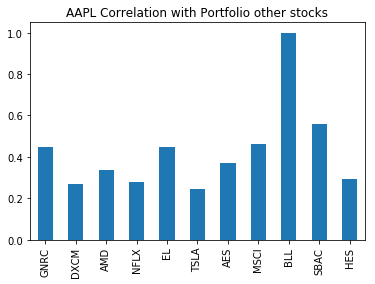

In [27]:
mult_df.corr()['BLL'].plot(kind='bar')
plt.title('AAPL Correlation with Portfolio other stocks')
plt.show()

In [28]:
days = len(mult_df.index)
days

756

In [29]:
def get_stock_price_on_date(ticker, date):
    df = get_df_from_csv(ticker)
    df = df.set_index(['Date'])
    return df.loc[date,'Adj Close']

In [30]:
print("GNRC $",get_stock_price_on_date('GNRC','2021-01-04'))
print("DXCM $",get_stock_price_on_date('DXCM','2021-01-04'))
print("AMD $",get_stock_price_on_date('AMD','2021-01-04'))
print("NFLX $",get_stock_price_on_date('NFLX','2021-01-04'))
print("EL $",get_stock_price_on_date('EL','2021-01-04'))
print("TSLA $",get_stock_price_on_date('TSLA','2021-01-04'))
print("AES $",get_stock_price_on_date('AES','2021-01-04'))
print("MSCI $",get_stock_price_on_date('MSCI','2021-01-04'))
print("BLL $",get_stock_price_on_date('BLL','2021-01-04'))
print("SBAC $",get_stock_price_on_date('SBAC','2021-01-04'))
print("HES $",get_stock_price_on_date('HES','2021-01-04'))

GNRC $ 224.5599975585937
DXCM $ 357.739990234375
AMD $ 92.3000030517578
NFLX $ 522.8599853515625
EL $ 253.2393798828125
TSLA $ 729.77001953125
AES $ 22.682537078857425
MSCI $ 434.7030944824219
BLL $ 89.06607818603516
SBAC $ 273.51544189453125
HES $ 52.11529541015625


In [31]:
#Returns Portfolio Weight
def get_port_weight(price,total):
    return price/total

In [32]:
GNRC=get_port_weight(449.12,4905.98)
DXCM=get_port_weight(357.74,4905.98)
AMD=get_port_weight(369.2,4905.98)
NFLX=get_port_weight(522.86,4905.98)
EL=get_port_weight(377.88,4905.98)
TSLA=get_port_weight(527.46,4905.98)
AES =get_port_weight(410.76,4905.98)
MSCI=get_port_weight(435.40,4905.98)
BLL=get_port_weight(434.49,4905.98)
SBAC=get_port_weight(548.84,4905.98)
HES =get_port_weight(472.23,4905.98)
weights=np.array([GNRC,DXCM,AMD,NFLX,EL,TSLA,AES,MSCI,BLL,SBAC,HES])
weights

array([0.09154542, 0.07291917, 0.0752551 , 0.10657606, 0.07702437,
       0.10751369, 0.08372639, 0.08874883, 0.08856335, 0.11187163,
       0.096256  ])

In [36]:
#Portfolio Covariance
port_var = np.dot(weights.T,np.dot(mult_df.cov()*756,weights))
print('Portfolio Covariance :',port_var)
print('GNRC Var :',mult_df['GNRC'].var()*756)

Portfolio Covariance : 0.23361631350157988
GNRC Var : 0.43946543607242516


In [40]:
#Diversifiable Risk = Portfolio Variance - All Weighted Variances
def calc_diversifiable_risk(df,tickers,weights):
    days=len(mult_df.index)
    port_covar = np.dot(weights.T,np.dot(df.cov()*days,weights))
    i = 0
    while i < len(tickers):
        wt_sq = weights[i]**2
        stk_var =mult_df[tickers[i]].var()*days
        wt_var = wt_sq * stk_var
        port_covar = port_covar - wt_var
        i += 1
    return port_covar

In [41]:
div_risk = calc_diversifiable_risk(mult_df, port_list, weights)
div_risk

0.1752065573737639

In [42]:
#Find Risk that Cant be diversified
print('Systematic Risk :' , (port_var - div_risk))

Systematic Risk : 0.05840975612781599
